In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from package.utils import DotDict, timer, get_config, load_data, merge_data

# from package.cluster_analysis import plot_elbow, plot_box_cluster, plot_box_cluster_sns, show_size_cluster, validate_decisiontree_cluster, plot_centroidsim_cluster, cal_featureimportance, plot_pca

from package.preprocessing import CONFIG_PATH

conf = get_config(CONFIG_PATH)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


function: get_config is starting...
function: get_config successfully executed at 0.0049440860748291016s


In [32]:
# path = 's3://tli-crm-segmentation/data-zones/neutral/grouped/feature_normalized_99pct.csv'
# path = 's3://tli-crm-segmentation/data-test/load_dt=20250425/EXPERIMENT_CRM_SEGMENTATION_99PCT_KMEANS.csv'
# path = 's3://tli-crm-segmentation/data-test/load_dt=20250425/EXPERIMENT_CRM_SEGMENTATION_0ANP_KMEANS.csv'
# path = 's3://tli-crm-segmentation/data-test/load_dt=20250425/EXPERIMENT_CRM_SEGMENTATION_1HOLD_KMEANS.csv'
# path = 's3://tli-crm-segmentation/data-test/load_dt=20250429/EXPERIMENT_CRM_SEGMENTATION_99PCT_KMEANS.csv'
# df = load_data(path)

function: load_data is starting...
loading data from: s3://tli-sas-analytic-based-table/sandbox/ad-hoc/True/feature/feature_ds7.csv
Succesfully loaded data from: s3://tli-sas-analytic-based-table/sandbox/ad-hoc/True/feature/feature_ds7.csv
function: load_data successfully executed at 0.0915215015411377s


In [3]:
load_dt = '20250616_final'

groupbehavior_list = ['99pct', '1hold', '0anp', 'other']
groupfamily_list = ['family', 'nofamily']
grouprider_list = ['rider', 'norider']
group_list = []
for behavior in groupbehavior_list:
    for family in groupfamily_list:
        for rider in grouprider_list:
            group = f'{behavior}_{family}_{rider}'
            group_list.append(group)

k_list = ['k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9']

99pct_family_rider
function: calculate_elbow is starting...


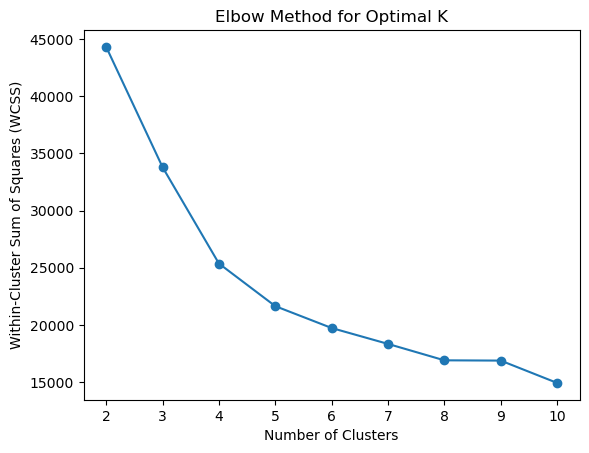

,k,wcss,%change,%change_minmax
0,2,44310.177026,NaN,NaN
1,3,33797.108884,-23.726080,-35.784246
2,4,25369.514938,-24.935843,-28.685736
3,5,21644.559513,-14.682801,-12.678955
4,6,19732.033930,-8.836057,-6.509830
5,7,18341.668602,-7.046234,-4.732508
6,8,16907.173774,-7.820961,-4.882715
7,9,16883.160565,-0.142030,-0.081736
8,10,14931.136358,-11.561960,-6.644275


function: calculate_elbow successfully executed at 0.27919435501098633s
99pct_family_norider
function: calculate_elbow is starting...


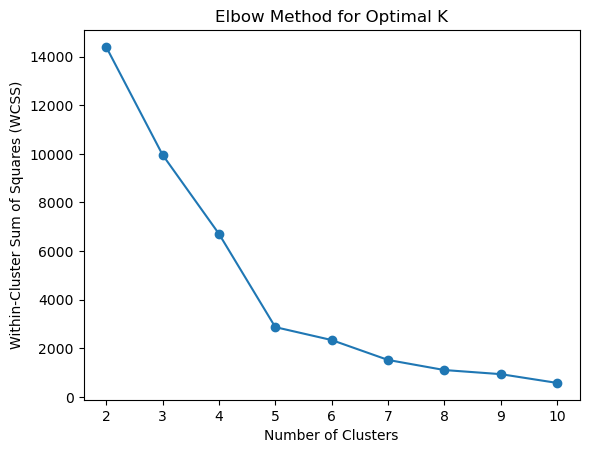

,k,wcss,%change,%change_minmax
0,2,14399.249819,NaN,NaN
1,3,9960.378064,-30.827104,-32.109536
2,4,6710.501401,-32.628045,-23.508684
3,5,2870.999518,-57.216319,-27.773865
4,6,2339.223555,-18.522329,-3.846716
5,7,1520.333283,-35.006927,-5.923619
6,8,1105.014552,-27.317611,-3.004298
7,9,936.152103,-15.281468,-1.221503
8,10,575.095801,-38.568124,-2.611779


function: calculate_elbow successfully executed at 0.24488401412963867s
99pct_nofamily_rider
function: calculate_elbow is starting...


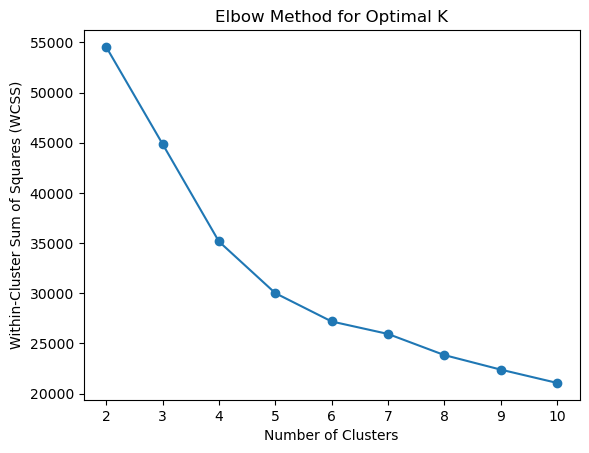

,k,wcss,%change,%change_minmax
0,2,54550.227854,NaN,NaN
1,3,44875.498629,-17.735452,-28.890745
2,4,35158.185437,-21.653939,-29.017909
3,5,30011.393645,-14.638957,-15.369386
4,6,27186.966317,-9.411184,-8.434325
5,7,25943.346433,-4.574324,-3.713706
6,8,23836.889450,-8.119450,-6.290317
7,9,22387.981284,-6.078428,-4.326740
8,10,21062.931815,-5.918575,-3.956872


function: calculate_elbow successfully executed at 0.2837200164794922s
99pct_nofamily_norider
function: calculate_elbow is starting...


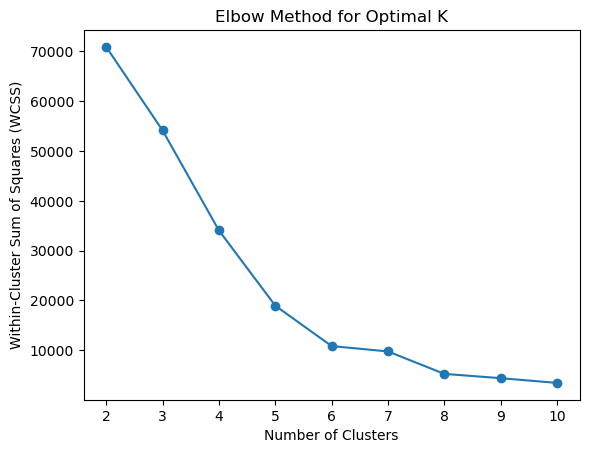

,k,wcss,%change,%change_minmax
0,2,70912.067340,NaN,NaN
1,3,54143.862471,-23.646476,-24.847389
2,4,34051.224040,-37.109725,-29.773586
3,5,18936.640579,-44.387783,-22.397027
4,6,10828.529943,-42.817049,-12.014725
5,7,9747.186917,-9.986056,-1.602351
6,8,5240.272865,-46.238100,-6.678416
7,9,4379.725126,-16.421812,-1.275173
8,10,3427.290274,-21.746453,-1.411333


function: calculate_elbow successfully executed at 0.8404011726379395s
1hold_family_rider
function: calculate_elbow is starting...


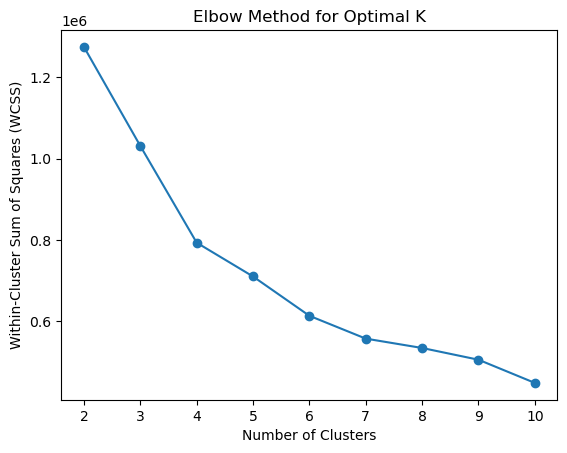

,k,wcss,%change,%change_minmax
0,2,1.274265e+06,NaN,NaN
1,3,1.031096e+06,-19.083086,-29.470305
2,4,7.935434e+05,-23.038853,-28.789636
3,5,7.104956e+05,-10.465431,-10.064772
4,6,6.139478e+05,-13.588806,-11.700890
5,7,5.579094e+05,-9.127539,-6.791431
6,8,5.349225e+05,-4.120199,-2.785852
7,9,5.060862e+05,-5.390736,-3.494742
8,10,4.491325e+05,-11.253761,-6.902372


function: calculate_elbow successfully executed at 2.8217673301696777s
1hold_family_norider
function: calculate_elbow is starting...


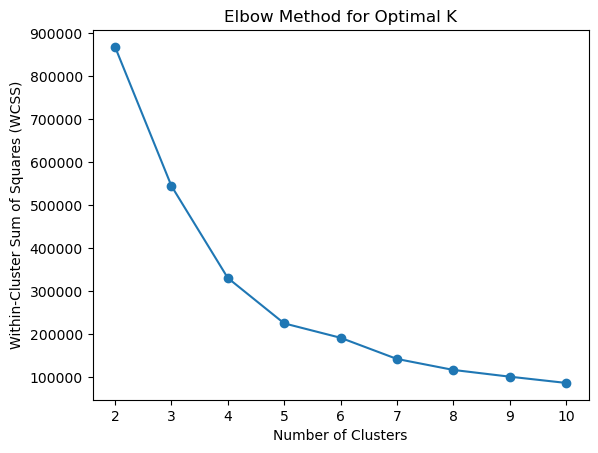

,k,wcss,%change,%change_minmax
0,2,868053.468070,NaN,NaN
1,3,544812.018102,-37.237505,-41.378416
2,4,330859.017071,-39.270977,-27.388308
3,5,225322.848460,-31.897625,-13.509776
4,6,191837.279051,-14.861151,-4.286517
5,7,142631.496099,-25.649750,-6.298875
6,8,117096.623983,-17.902688,-3.268741
7,9,101427.793242,-13.381112,-2.005780
8,10,86869.743837,-14.353117,-1.863588


function: calculate_elbow successfully executed at 2.4805307388305664s
1hold_nofamily_rider
function: calculate_elbow is starting...


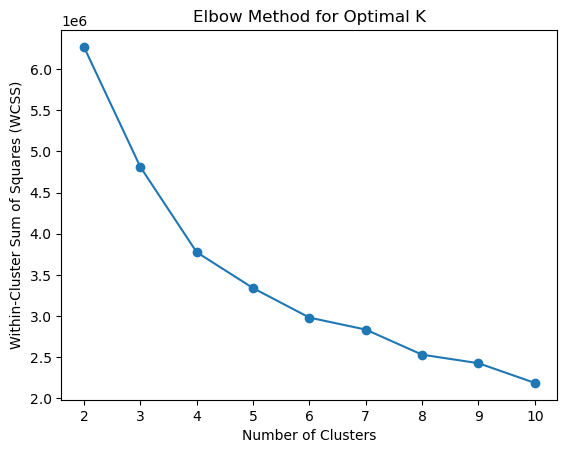

,k,wcss,%change,%change_minmax
0,2,6.270442e+06,NaN,NaN
1,3,4.812554e+06,-23.250166,-35.702126
2,4,3.775626e+06,-21.546317,-25.393264
3,5,3.339460e+06,-11.552132,-10.681222
4,6,2.980891e+06,-10.737347,-8.780984
5,7,2.835028e+06,-4.893285,-3.572041
6,8,2.530253e+06,-10.750305,-7.463592
7,9,2.426450e+06,-4.102485,-2.542031
8,10,2.186965e+06,-9.869780,-5.864739


function: calculate_elbow successfully executed at 4.605560779571533s
1hold_nofamily_norider
function: calculate_elbow is starting...


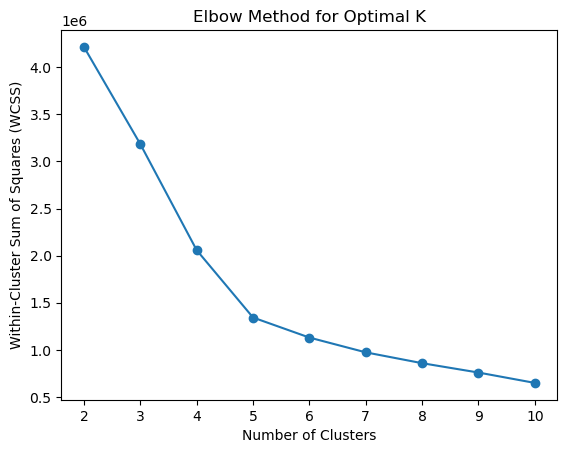

,k,wcss,%change,%change_minmax
0,2,4.215020e+06,NaN,NaN
1,3,3.183825e+06,-24.464773,-28.918309
2,4,2.058068e+06,-35.358622,-31.570146
3,5,1.343197e+06,-34.735061,-20.047486
4,6,1.130397e+06,-15.842835,-5.967669
5,7,9.735716e+05,-13.873455,-4.397922
6,8,8.584975e+05,-11.819780,-3.227077
7,9,7.591791e+05,-11.568869,-2.785236
8,10,6.491302e+05,-14.495776,-3.086155


function: calculate_elbow successfully executed at 4.368969917297363s
0anp_family_rider
function: calculate_elbow is starting...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in

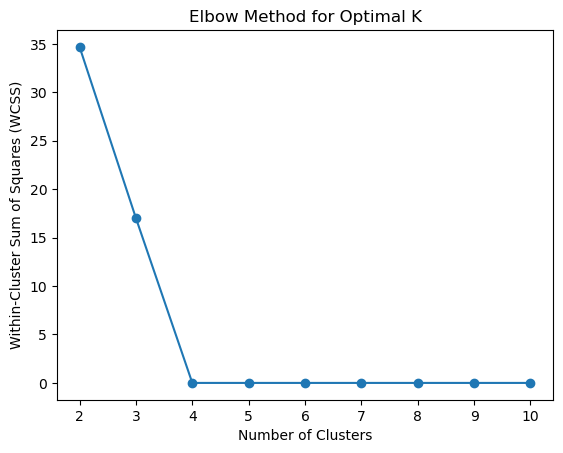

,k,wcss,%change,%change_minmax
0,2,3.468341e+01,NaN,NaN
1,3,1.700974e+01,-50.957127,-5.095713e+01
2,4,5.423419e-31,-100.000000,-4.904287e+01
3,5,5.793197e-31,6.818182,1.066154e-31
4,6,3.328007e-31,-42.553191,-7.107693e-31
5,7,3.697785e-31,11.111111,1.066154e-31
6,8,6.162976e-31,66.666667,7.107693e-31
7,9,6.162976e-31,0.000000,0.000000e+00
8,10,1.355855e-30,120.000000,2.132308e-30


function: calculate_elbow successfully executed at 0.21841192245483398s
0anp_family_norider
function: calculate_elbow is starting...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in

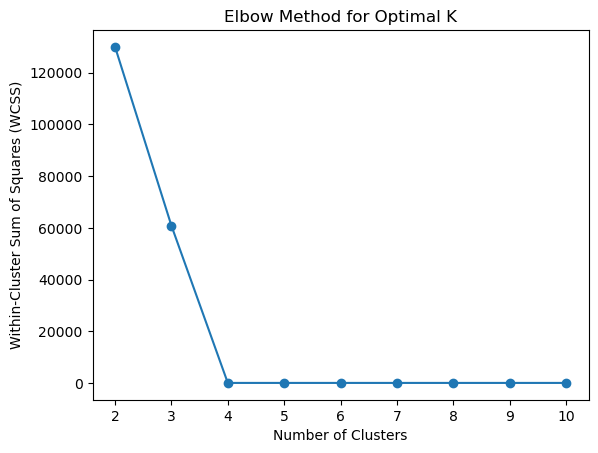

,k,wcss,%change,%change_minmax
0,2,1.299875e+05,NaN,NaN
1,3,6.081592e+04,-53.214033,-5.321403e+01
2,4,3.106462e-22,-100.000000,-4.678597e+01
3,5,3.106635e-22,0.005563,1.329382e-29
4,6,3.107317e-22,0.021955,5.247196e-29
5,7,3.117684e-22,0.333652,7.975856e-28
6,8,3.096854e-22,-0.668118,-1.602446e-27
7,9,3.097108e-22,0.008181,1.949166e-29
8,10,3.086926e-22,-0.328756,-7.832992e-28


function: calculate_elbow successfully executed at 1.4221858978271484s
0anp_nofamily_rider
function: calculate_elbow is starting...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in

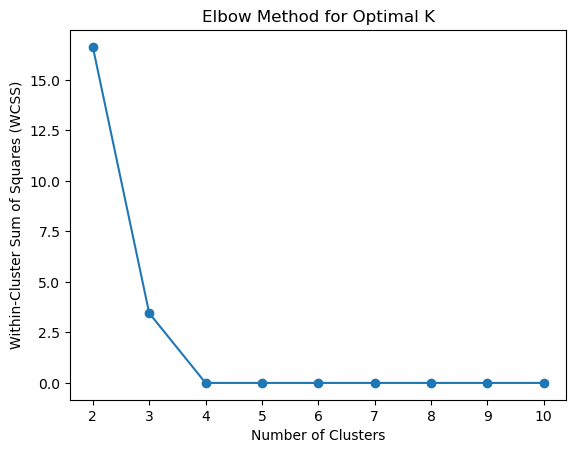

,k,wcss,%change,%change_minmax
0,2,1.663750e+01,NaN,NaN
1,3,3.457143e+00,-79.220779,-79.220779
2,4,1.479114e-31,-100.000000,-20.779221
3,5,1.479114e-31,0.000000,0.000000
4,6,1.479114e-31,0.000000,0.000000
5,7,1.479114e-31,0.000000,0.000000
6,8,1.479114e-31,0.000000,0.000000
7,9,1.479114e-31,0.000000,0.000000
8,10,1.479114e-31,0.000000,0.000000


function: calculate_elbow successfully executed at 0.21007776260375977s
0anp_nofamily_norider
function: calculate_elbow is starting...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in

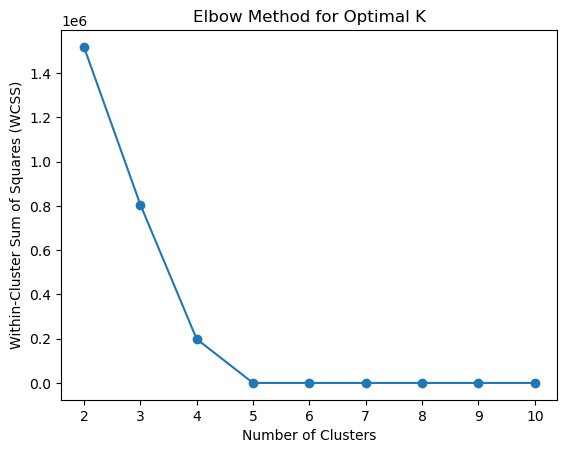

,k,wcss,%change,%change_minmax
0,2,1.518358e+06,NaN,NaN
1,3,8.061098e+05,-46.909100,-4.690910e+01
2,4,1.983087e+05,-75.399291,-4.003016e+01
3,5,2.218546e-19,-100.000000,-1.306074e+01
4,6,2.218853e-19,0.013838,2.021883e-27
5,7,2.220340e-19,0.067041,9.797064e-27
6,8,2.219378e-19,-0.043339,-6.337664e-27
7,9,2.218780e-19,-0.026958,-3.940384e-27
8,10,2.220365e-19,0.071467,1.044349e-26


function: calculate_elbow successfully executed at 3.6182034015655518s
other_family_rider
function: calculate_elbow is starting...


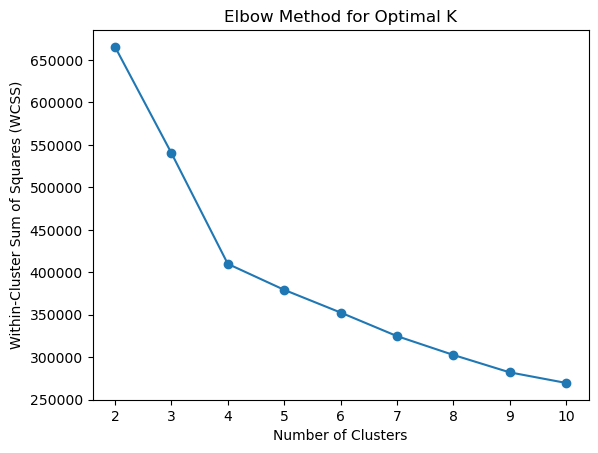

,k,wcss,%change,%change_minmax
0,2,665319.091296,NaN,NaN
1,3,540312.718415,-18.788935,-31.603242
2,4,409907.047520,-24.135221,-32.968255
3,5,379359.892765,-7.452215,-7.722719
4,6,352656.614600,-7.039036,-6.750937
5,7,324922.124554,-7.864446,-7.011641
6,8,302739.317904,-6.827115,-5.608103
7,9,282235.829224,-6.772655,-5.183550
8,10,269769.890532,-4.416852,-3.151552


function: calculate_elbow successfully executed at 2.7600936889648438s
other_family_norider
function: calculate_elbow is starting...


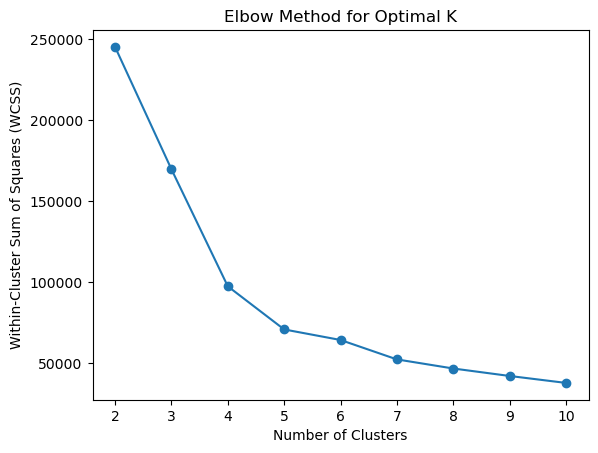

,k,wcss,%change,%change_minmax
0,2,245004.337831,NaN,NaN
1,3,169631.309633,-30.763957,-36.412004
2,4,97525.420137,-42.507418,-34.833680
3,5,70952.382806,-27.247293,-12.837185
4,6,64456.140647,-9.155777,-3.138274
5,7,52492.555003,-18.560816,-5.779496
6,8,46885.100954,-10.682380,-2.708909
7,9,42285.353010,-9.810682,-2.222095
8,10,38003.841938,-10.125282,-2.068358


function: calculate_elbow successfully executed at 1.432474136352539s
other_nofamily_rider
function: calculate_elbow is starting...


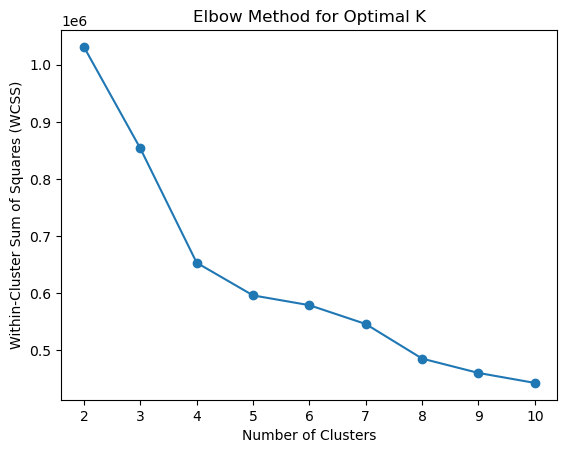

,k,wcss,%change,%change_minmax
0,2,1.031238e+06,NaN,NaN
1,3,8.535703e+05,-17.228614,-30.199822
2,4,6.533584e+05,-23.455811,-34.031785
3,5,5.961672e+05,-8.753425,-9.721304
4,6,5.790400e+05,-2.872888,-2.911265
5,7,5.460646e+05,-5.694829,-5.605112
6,8,4.854938e+05,-11.092253,-10.295769
7,9,4.603780e+05,-5.173237,-4.269147
8,10,4.429300e+05,-3.789936,-2.965797


function: calculate_elbow successfully executed at 3.0012128353118896s
other_nofamily_norider
function: calculate_elbow is starting...


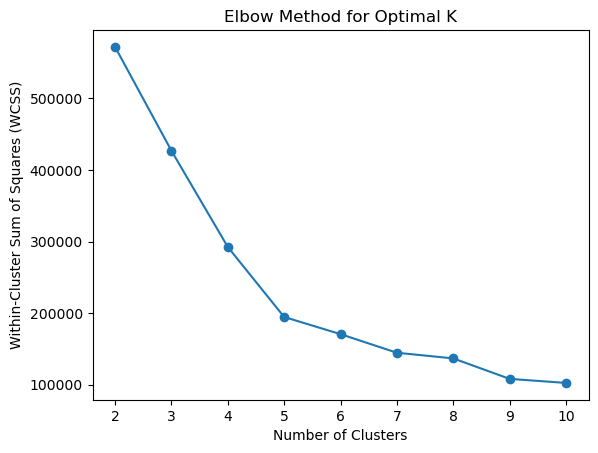

,k,wcss,%change,%change_minmax
0,2,572087.168916,NaN,NaN
1,3,426903.771717,-25.377845,-30.905535
2,4,292390.086163,-31.509135,-28.634248
3,5,194506.843272,-33.476936,-20.836639
4,6,170508.588630,-12.338000,-5.108566
5,7,144517.558940,-15.243238,-5.532772
6,8,136609.210574,-5.472240,-1.683469
7,9,107972.093488,-20.962801,-6.096051
8,10,102322.132665,-5.232797,-1.202721


function: calculate_elbow successfully executed at 2.5807347297668457s


In [7]:
for group in group_list:
    path = f's3://tli-crm-segmentation/data-zones/neutral/grouped/feature_normalized_{group}.csv'
    X = pd.read_csv(path).set_index('party_rk')
    print(group)
    calculate_elbow(X=X, max_k=10)

In [3]:
from sklearn.preprocessing import StandardScaler

def norm_feature(data):
    scaler = StandardScaler()
    feature_norm = scaler.fit_transform(data)
    feature_norm_df = pd.DataFrame(data=feature_norm, columns=data.columns, index=data.index)
    return scaler, feature_norm_df

path = 's3://tli-sas-analytic-based-table/sandbox/ad-hoc/True/feature/feature_ds7.csv'
raw_df = load_data(path=path)
raw_df = raw_df[raw_df.columns[1:]].set_index('party_id')
_, X = norm_feature(data=raw_df)

function: load_data is starting...
loading data from: s3://tli-sas-analytic-based-table/sandbox/ad-hoc/True/feature/feature_ds7.csv


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:294: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


Succesfully loaded data from: s3://tli-sas-analytic-based-table/sandbox/ad-hoc/True/feature/feature_ds7.csv
function: load_data successfully executed at 0.4578676223754883s


In [20]:
df.columns = [col.upper() for col in df.columns]
df = df.set_index('PARTY_RK').copy()
# cols = [col for col in df.columns if 'SCALED_' in col]
# X = df[cols].copy()
X = df.copy()

In [6]:
from sklearn.cluster import KMeans

@timer
def calculate_elbow(X, max_k):
    inertia = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    plt.plot(range(2, max_k+1), inertia, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.show()
    
    data_dict = {
        'k': list(range(2, max_k+1)),
        'wcss': inertia
    }
    proxy = pd.DataFrame(data_dict)
    proxy['%change'] = (proxy['wcss']-proxy['wcss'].shift(1))/proxy['wcss'].shift(1) * 100
    minmax = proxy['wcss'].max() - proxy['wcss'].min()
    proxy['%change_minmax'] = (proxy['wcss']-proxy['wcss'].shift(1))/minmax * 100
    display(proxy)
    
# calculate_elbow(X=X, max_k=10)

function: plot_find_k is starting...


100%|██████████| 6/6 [00:23<00:00,  3.91s/it]
<timed exec>:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
<timed exec>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.


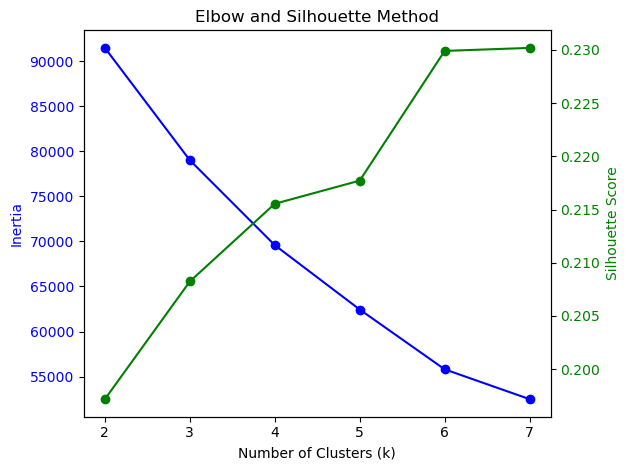

function: plot_find_k successfully executed at 23.81350612640381s
CPU times: user 51.6 s, sys: 8.45 s, total: 1min
Wall time: 23.8 s


In [6]:
%%time

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

@timer
def plot_find_k(X, max_k):
    k_range = range(2, max_k)
    
    inertia = []
    silhouette_scores = []

    for k in tqdm(k_range):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)

        inertia.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

        # print(f'k={k}, silhouette score={silhouette_avg}')

    fig, ax1 = plt.subplots()

    ax1.plot(k_range, inertia, 'bo-', label='Inertia (Elbow)', color='blue')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(k_range, silhouette_scores, 'go-', label='Silhouette Score', color='green')
    ax2.set_ylabel('Silhouette Score', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title('Elbow and Silhouette Method')
    fig.tight_layout()

    plt.show()
    
plot_find_k(X=X, max_k=8)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

def sampling_x(model, X):
    labels = model.labels_
    n_sampling = pd.Series(labels).value_counts(normalize=True) * 10000
    n_sampling = n_sampling.clip(lower=1).round().astype(int)

    proxy = []
    for i in n_sampling.index:
        indices = np.where(labels == i)[0]
        n = n_sampling[i]
        sampling_indices = np.random.choice(indices, n, replace=False)
        proxy.append(X[sampling_indices])
    proxy = np.concatenate(proxy, axis=0)
    return proxy

@timer
def plot_find_k(X, max_k):
    X = np.array(X)
    k_range = range(2, max_k)
    
    inertia = []
    silhouette_scores = []

    for k in tqdm(k_range):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        silhouette_list = []
        for i in range(10):
            x = sampling_x(model=kmeans, X=X)
            labels = kmeans.predict(x)
            silhouette_list.append(silhouette_score(x, labels))
        silhouette_avg = sum(silhouette_list)/len(silhouette_list)
        silhouette_scores.append(silhouette_avg)

        # print(f'k={k}, silhouette score={silhouette_avg}')

    fig, ax1 = plt.subplots()

    ax1.plot(k_range, inertia, 'bo-', label='Inertia (Elbow)', color='blue')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(k_range, silhouette_scores, 'go-', label='Silhouette Score', color='green')
    ax2.set_ylabel('Silhouette Score', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title('Elbow and Silhouette Method')
    fig.tight_layout()

    plt.show()

In [5]:
plot_find_k(X=X, max_k=8)

function: plot_find_k is starting...


  0%|          | 0/6 [00:07<?, ?it/s]


KeyboardInterrupt: 